In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake news LSTM/train.csv')

In [3]:
df.head()

id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]

In [4]:
#check for nan values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
###Drop Nan Values
df=df.dropna()

In [6]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [8]:
## Get the Dependent features
y=df['label']

In [9]:
(X.shape)


(18285, 4)

In [10]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [12]:
### Vocabulary size
voc_size=15000

#ONE HOT REPRESENTATION

In [13]:
messages=X.copy()

In [14]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [15]:
messages.reset_index(inplace=True)

In [16]:
messages.head()

index  ...                                               text
0      0  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
1      1  ...  Ever get the feeling your life circles the rou...
2      2  ...  Why the Truth Might Get You Fired October 29, ...
3      3  ...  Videos 15 Civilians Killed In Single US Airstr...
4      4  ...  Print \nAn Iranian woman has been sentenced to...

[5 rows x 5 columns]

In [17]:
import nltk
import re
from nltk.corpus import stopwords

In [21]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus=[]
for i in range(0, len(messages)):
    str1 = messages['title'][i]
    str2 = messages['text'][i]
    str3 = str1+" "+str2 
    review = re.sub('[^a-zA-Z]', ' ', str3)
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [24]:
corpus[0]

'house dem aide even see comey letter jason chaffetz tweeted house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case reopened jas

In [27]:
len(corpus)

18285

In [32]:
max_len=0
for i in range(0,len(corpus)):
  mess_len=len(corpus[i].split())
  if mess_len>max_len:
    max_len = mess_len

In [33]:
max_len

12065

In [25]:
#APPLYING ONE HOT REPRESENTATION
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[10889,
  11662,
  12562,
  10221,
  5281,
  4171,
  12757,
  187,
  5328,
  9970,
  10889,
  11662,
  12562,
  10221,
  5281,
  4171,
  12757,
  187,
  5328,
  9970,
  4796,
  14281,
  14629,
  8734,
  187,
  5328,
  11013,
  5664,
  14482,
  13939,
  4909,
  4513,
  12207,
  3806,
  2621,
  551,
  1816,
  11757,
  9845,
  1170,
  5089,
  1055,
  7855,
  3439,
  12917,
  6786,
  13893,
  12854,
  1198,
  4171,
  9634,
  10889,
  3064,
  12562,
  2840,
  4406,
  6237,
  11141,
  11603,
  7855,
  3439,
  8105,
  9434,
  4171,
  3215,
  2905,
  12757,
  1257,
  13893,
  3499,
  385,
  1212,
  7729,
  4371,
  8141,
  385,
  6518,
  9110,
  11360,
  11200,
  14478,
  5839,
  4171,
  11772,
  13774,
  2021,
  136,
  2885,
  14478,
  10745,
  11141,
  4171,
  8326,
  2885,
  10745,
  3064,
  9110,
  4337,
  10889,
  2487,
  3264,
  1094,
  14478,
  4612,
  11924,
  385,
  12887,
  7079,
  1209,
  5281,
  4297,
  948,
  8503,
  6609,
  12757,
  5097,
  1094,
  14478,
  10745,
  187,
  5328,


#EMBEDDDING REPRESENATION

In [34]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=max_len)
print(embedded_docs)

[[    0     0     0 ...  5748  1087  7382]
 [    0     0     0 ...  7434  9633  2047]
 [    0     0     0 ...  7959 11553 10444]
 ...
 [    0     0     0 ... 10426 10636  9966]
 [    0     0     0 ...  7393 14575  4312]
 [    0     0     0 ...  1476   830  9348]]


In [35]:
embedded_docs[0].shape

(12065,)

In [36]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12065, 40)         600000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 656,501
Trainable params: 656,501
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
len(embedded_docs),y.shape

(18285, (18285,))

In [38]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [39]:
X_final.shape,y_final.shape

((18285, 12065), (18285,))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

#MODEL TRAINING

In [41]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 130s 633ms/step - loss: 0.3254 - accuracy: 0.8495 - val_loss: 0.1821 - val_accuracy: 0.9332
Epoch 2/10
192/192 [==============================] - 120s 625ms/step - loss: 0.1234 - accuracy: 0.9587 - val_loss: 0.2663 - val_accuracy: 0.8872
Epoch 3/10
192/192 [==============================] - 118s 616ms/step - loss: 0.0884 - accuracy: 0.9717 - val_loss: 0.2058 - val_accuracy: 0.9292
Epoch 4/10
192/192 [==============================] - 116s 607ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.2283 - val_accuracy: 0.9263
Epoch 5/10
192/192 [==============================] - 117s 608ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.3052 - val_accuracy: 0.9258
Epoch 6/10
192/192 [==============================] - 117s 608ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.2923 - val_accuracy: 0.9193
Epoch 7/10
192/192 [==============================] - 116s 606ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.3255 -

In [42]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3160,  259],
       [ 198, 2418]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9242750621375311

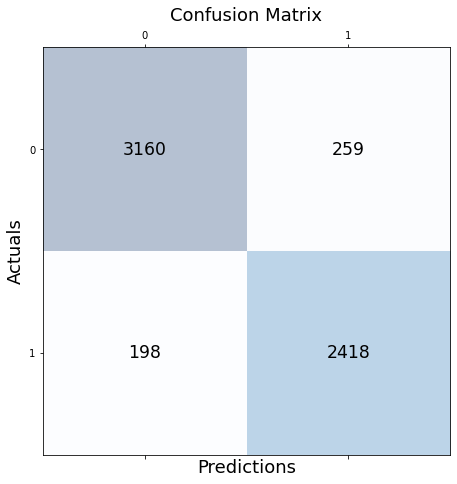

In [46]:
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()